In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
# Load CSV file as dataframe

df = pd.read_csv("data/conflict_articles_cleaned_handlabeled.csv")
df.head()

,summary,date,chat_GPT_location,lat,lng,article_id,cd_district_name,hunger_bert,refugees_bert,humanitarian_bert,conflict_bert,Conflict,County level,Unity level,South Sudan / Liberation movement Conflict,Additional Notes
0,The article discusses the killing of rebel lea...,2011-07-23,Koch county,8.684727,29.881520,299,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
1,The article discusses the killing of South Sud...,2011-07-23,Unity state,8.927721,29.788925,327,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
2,The article discusses the death of rebel leade...,2011-07-25,Bentiu,9.231487,29.800503,371,Rubkona,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
3,The article discusses the assassination of Gat...,2011-08-05,Unity state,8.927721,29.788925,493,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
4,The article discusses the challenges faced by ...,2011-10-20,Unity state,8.927721,29.788925,934,Koch,False,False,False,True,1,no,yes,no,Very broadly mentioned challenges faced by Sou...


### Create a pie chart that shows where all articles come from

(-1.0999983499183985,
 1.099999558511648,
 -1.0999999258070263,
 1.099998919803274)

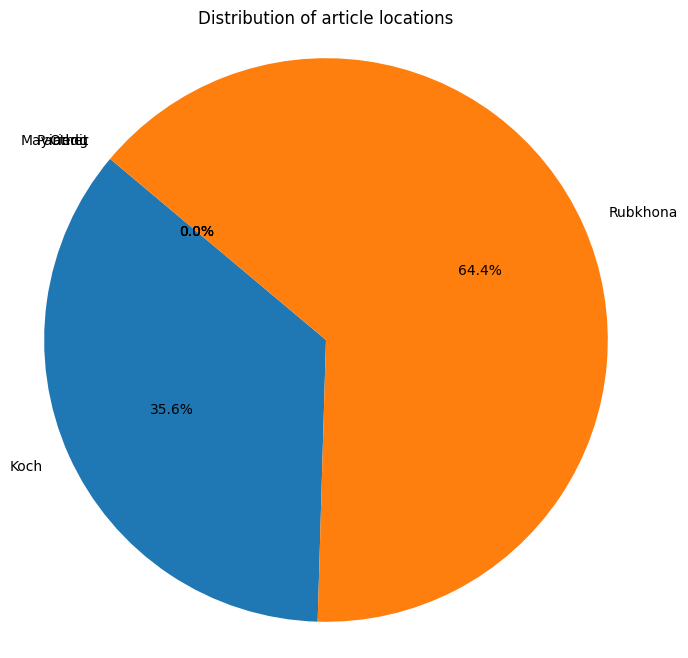

In [86]:
count_koch = 0
count_bentiu = 0
count_rubkhona = 0
count_unity = 0
count_parieng = 0
count_mayiandit = 0
count_else = 0

for name in df["cd_district_name"]:
    if "koch" in name.lower():
        count_koch += 1
    elif "unity" in name.lower():
        count_koch += 1
        count_rubkhona += 1
        count_parieng += 1
        count_mayiandit += 1
    elif "parieng" in name.lower():
        count_parieng += 1
    elif "mayiandit" in name.lower():
        count_mayiandit += 1
    elif "bentiu" in name.lower():
        count_rubkhona += 1
    elif "rubkona" in name.lower():
        count_rubkhona += 1
    else:
        count_else += 1

# print(set(df['chat_GPT_location']))
# print(len(df["cd_district_name"]))
# print(count_koch+count_bentiu+count_rubkhona+count_unity+count_else)
    
# Create a pie chart using the "Conflict" column
plt.figure(figsize=(8, 8))
plt.pie([count_koch, count_rubkhona, count_parieng, count_mayiandit, count_else], labels=["Koch", "Rubkhona", "Parieng", "Mayiandit", "Other"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of article locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

### Create a new dataframe with all names lower case and split county's in separate dataframes

In [74]:
# Lower case all strings in a new dataframe
df_lowercase = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [75]:
# Create dataframe with only Koch
substring_to_find = 'koch'

# Create a boolean mask to filter rows containing the substring
mask = df_lowercase.apply(lambda row: any(substring_to_find in str(cell) for cell in row), axis=1)

# Use the boolean mask to extract rows containing the substring
df_koch = df[mask]
koch_mean_conflict = df_koch["Conflict"].mean()

In [76]:
# Create dataframe with only Rubkhona
substring_to_find = 'rubkhona'

# Create a boolean mask to filter rows containing the substring
mask = df_lowercase.apply(lambda row: any(substring_to_find in str(cell) for cell in row), axis=1)

# Use the boolean mask to extract rows containing the substring
df_rubkhona = df[mask]
rubkhona_mean_conflict = df_rubkhona["Conflict"].mean()

In [77]:
# Create dataframe with only Parieng
substring_to_find = 'parieng'

# Create a boolean mask to filter rows containing the substring
mask = df_lowercase.apply(lambda row: any(substring_to_find in str(cell) for cell in row), axis=1)

# Use the boolean mask to extract rows containing the substring
df_parieng = df[mask]
parieng_mean_conflict = df_parieng["Conflict"].mean()


In [82]:
# Create dataframe with only Mayiandit
substring_to_find = 'mayiandit'

# Create a boolean mask to filter rows containing the substring
mask = df_lowercase.apply(lambda row: any(substring_to_find in str(cell) for cell in row), axis=1)

# Use the boolean mask to extract rows containing the substring
df_mayiandit = df[mask]
mayiandit_mean_conflict = df_mayiandit["Conflict"].mean()

In [85]:
# print("Koch: ", koch_mean_conflict)
# print("Rubkhona: ", rubkhona_mean_conflict)
# print("Parieng: ", parieng_mean_conflict)
# print("Mayiandit: ", mayiandit_mean_conflict)

### Create a bar plot of average conflict per county

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


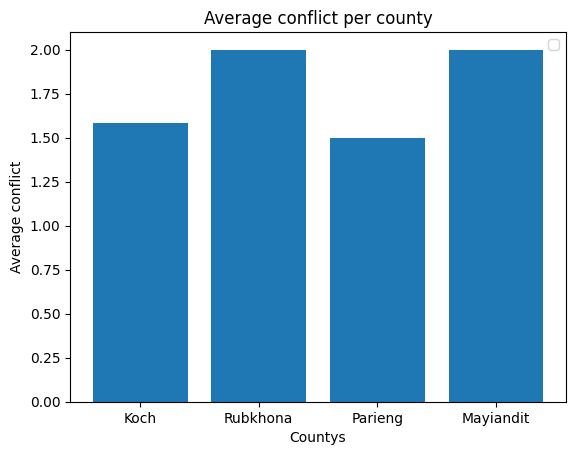

In [88]:
# Initialize a dataframe
df_barplot = pd.DataFrame()

df_barplot["County"] = ["Koch", "Rubkhona", "Parieng", "Mayiandit"]
df_barplot["Average conflict"] = [koch_mean_conflict, rubkhona_mean_conflict, parieng_mean_conflict, mayiandit_mean_conflict]

# Create a barplot
plt.bar(df_barplot["County"], df_barplot["Average conflict"])

plt.xlabel('Countys')
plt.ylabel('Average conflict')
plt.title('Average conflict per county')
plt.legend()

plt.show()